# DataCamp's Investigating Netflix Movies Project

**Author**: Vimalathas Vithusan  
**GitHub**: [github.com/thasvithu](https://github.com/thasvithu)  
**Last Updated**: April 22, 2025  
**Data Source**: `netflix_data.csv`

---

## Objective

The goal of this project is to analyze Netflix movie data, specifically focusing on titles released during the 1990s.  
We will explore trends in movie durations and genres through structured exploratory data analysis (EDA) and answer the following:

---

## Key Questions

1. **What was the most frequent movie duration in the 1990s?**  
   - Store the answer in a variable called `duration`.

2. **How many short action movies (less than 90 minutes) were released in the 1990s?**  
   - Store this as an integer called `short_movie_count`.

In [67]:
# =============================================================================
# Load Dataset and Initial Exploration
# =============================================================================

In [57]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 
sns.set_palette("tab10")

In [5]:
# Load the dataset
df = pd.read_csv("netflix_data.csv")

# Preview the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [6]:
# view the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


$ The dataframe has 11 features, there are no null values.

In [8]:
# check the rows and columns
df.shape

(4812, 11)

- The dataset has no missing values
- The dataset has 4812 Rows and 11 Columns

In [10]:
# Proving the dataset has no missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [13]:
# =============================================================================
# Exploratory Data Analysis (EDA)
# =============================================================================

In [19]:
# filter the dataset that contain only 90s movies
df_90s = df[(df["release_year"] >= 1990) & (df["release_year"] < 2000) & (df["type"] == "Movie")]
df_90s

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
...,...,...,...,...,...,...,...,...,...,...,...
4672,s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,"October 19, 2020",1999,106,Three intrepid teens roam the streets of Beiru...,Dramas
4689,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",1993,118,"In a backwater Iowa town, young Gilbert is tor...",Classic Movies
4718,s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,106,"Armed with an ingenious arsenal, two top-notch...",Action
4746,s7682,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,191,Legendary lawman Wyatt Earp is continually at ...,Action


In [23]:
# confirming df_90s has only Movies data
df_90s["type"].unique()

array(['Movie'], dtype=object)

In [28]:
# check the dataset has any duplicats
df_90s.duplicated().sum()

0

- Dataset does not has any duplicates entries

In [39]:
# Answer
# What was the most frequent movie duration in the 1990s?
print(f"Most frequent movie duration is : {df_90s["duration"].mode()[0]}")

Most frequent movie duration is : 94


In [48]:
# Answer
# How many short action movies (less than 90 minutes) were released in the 1990s?
action_movies_90s  = df_90s[
    (df_90s["duration"] < 90) &
    (df_90s["genre"] == "Action")
]
action_movies_90s

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
1698,s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
2328,s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
2993,s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
3297,s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action
3806,s6114,Movie,The Bare-Footed Kid,Johnnie To,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,"August 16, 2018",1993,83,"While working at a family friend's business, a...",Action
3943,s6330,Movie,The End of Evangelion,"Hideaki Anno, Kazuya Tsurumaki","Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1997,87,"Seele orders an all-out attack on NERV, aiming...",Action


In [50]:
short_movie_count = action_movies_90s.shape[0]
print("Short action movies in 1990s:", short_movie_count)

Short action movies in 1990s: 7


In [51]:
# =============================================================================
# Data Visualization
# =============================================================================

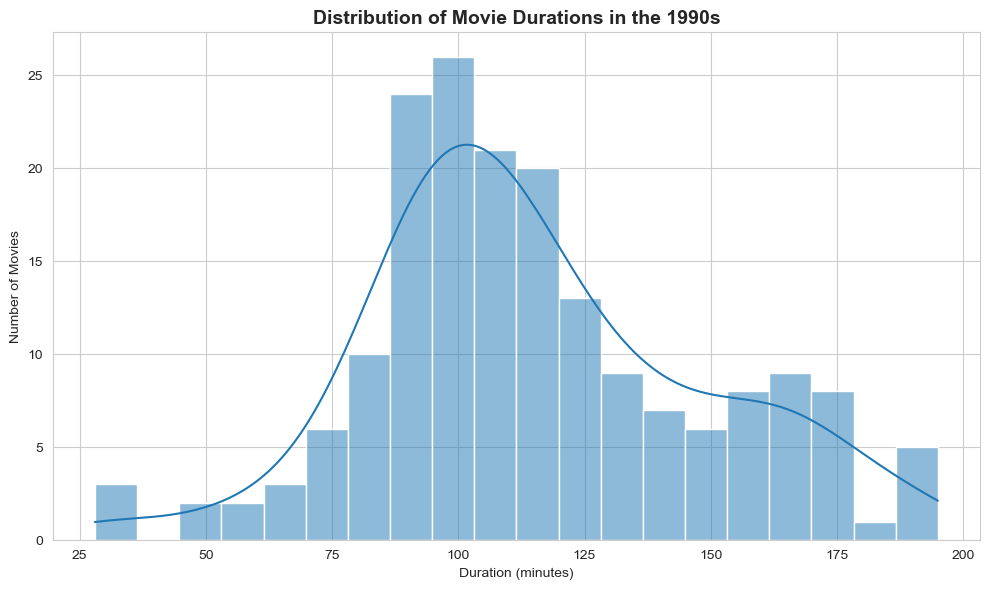

In [60]:
# Duration Distribution of 1990s Movies
plt.figure(figsize=(10, 6))
sns.histplot(data=df_90s['duration'], bins=20, kde=True)
plt.title('Distribution of Movie Durations in the 1990s', fontsize=14, fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

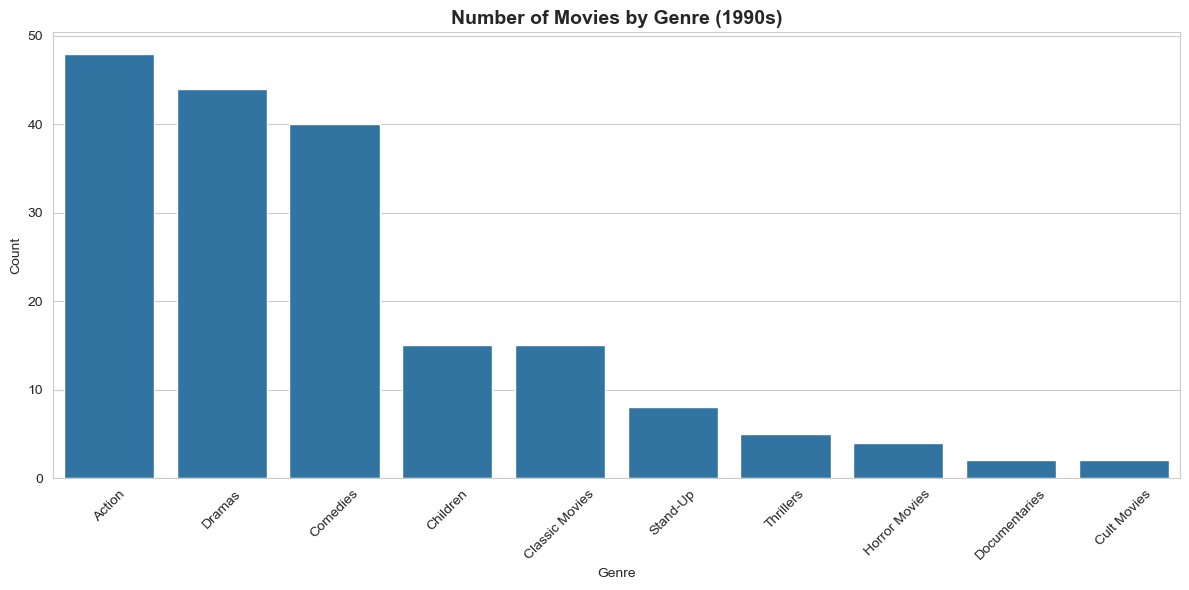

In [61]:
# Genre Counts of 1990s Movies
plt.figure(figsize=(12, 6))
sns.countplot(data=df_90s, x='genre', order=df_90s['genre'].value_counts().index)
plt.title('Number of Movies by Genre (1990s)', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

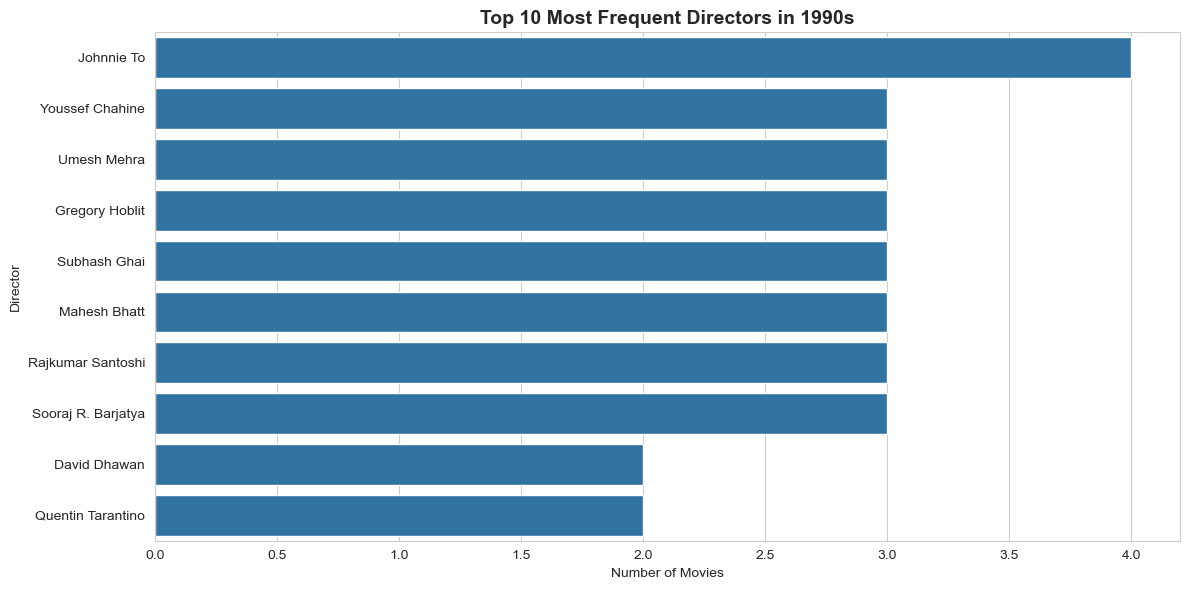

In [62]:
# Top 10 Most Frequent Directors
plt.figure(figsize=(12, 6))
top_directors = df_90s['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Most Frequent Directors in 1990s', fontsize=14, fontweight='bold')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

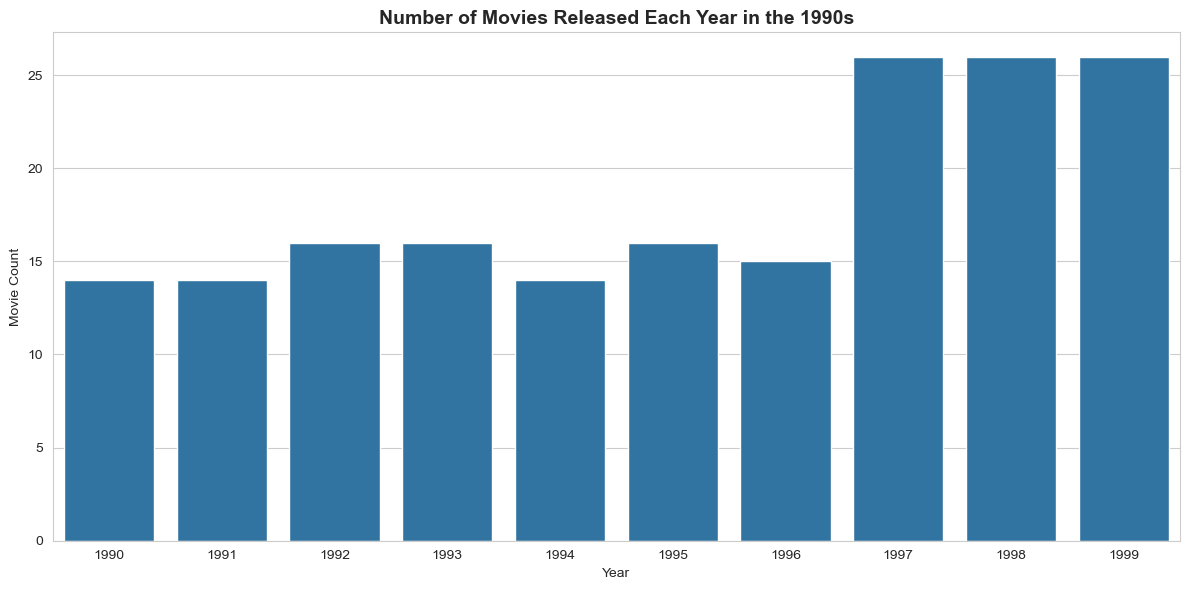

In [65]:
# Number of Movies Released per Year
plt.figure(figsize=(12, 6))
sns.countplot(data=df_90s, x='release_year')
plt.title('Number of Movies Released Each Year in the 1990s', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Movie Count')
plt.tight_layout()
plt.show()